In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [26]:
folder_paths =["../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/",
              "../snakemake-workflow/output/weight_loss/trnl.100/cmon_name_annot/"
              ]
dataframes = []

In [27]:
for folder_path in folder_paths:
    print(f"{folder_path}")
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)
final_df = pd.concat(dataframes, ignore_index=True)

../snakemake-workflow/output/weight_loss/all_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/all_chloroplast.1000/cmon_name_annot
../snakemake-workflow/output/weight_loss/crop_chloroplast.100/cmon_name_annot/
../snakemake-workflow/output/weight_loss/crop_chloroplast.1000/cmon_name_annot/
../snakemake-workflow/output/weight_loss/trnl.1/cmon_name_annot/


In [28]:
db_key_dict = {'db.crop-plant-entrez.ref.1000.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.1000.sig.zip': 'all_chloroplast', 
                'db.crop-plant-entrez.ref.100.sig.zip': 'crop_chloroplast', 
                'db.plant-entrez-ref.100.sig.zip': 'all_chloroplast', 
                'db.trnL-entrez-ref.fasta.bz2.sig': 'trnl_1'}

In [29]:
final_df.shape

(19484, 42)

In [30]:
final_df.groupby('filename').size()

filename
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
dtype: int64

In [31]:
final_df.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name'],
      dtype='object')

In [32]:
def db_shorthand(filename):
    return db_key_dict[filename.split('/')[-1]]

In [33]:
final_df['filename'].value_counts()

/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.100.sig.zip          9124
../db/Sketched-db/db.trnL-entrez-ref.fasta.bz2.sig                                       6073
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.100.sig.zip     2559
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.plant-entrez-ref.1000.sig.zip         1252
/home/sjnair/2023-dietary-plants/db/Sketched-db/db.crop-plant-entrez.ref.1000.sig.zip     476
Name: filename, dtype: int64

In [34]:
final_df['db'] = final_df['filename'].apply(db_shorthand)

In [35]:
final_df['db'].unique()

array(['all_chloroplast', 'crop_chloroplast', 'trnl_1'], dtype=object)

In [36]:
def cmon_name_col(df): # combines the 3 sources into one column. Priority given to USDA first.
    priority_order =['usda_common_name','trnl_common_name','foodb_common_name']
    df['common_name'] = df['usda_common_name']
    for column in priority_order[1:]:
        df['common_name'] = df['common_name'].combine_first(df[column])

In [37]:
cmon_name_col(final_df)

In [38]:
final_df['usda_common_name'].value_counts()

velvet bean              162
avocado                   99
rough lemon               96
oysternut                 90
tea                       86
                        ... 
California fan palm        1
buzzy lizzy                1
alligatorweed              1
narrowleaf goldshower      1
pygmy waterlily            1
Name: usda_common_name, Length: 592, dtype: int64

In [39]:
final_df['common_name'].value_counts()

velvet bean          162
avocado               99
rough lemon           96
oysternut             90
tea                   86
                    ... 
Brazilian vervain      1
dragontree             1
flame bottletree       1
fuchsia begonia        1
meadow ryegrass        1
Name: common_name, Length: 671, dtype: int64

## chart making

In [40]:
final_df.columns

Index(['intersect_bp', 'f_orig_query', 'f_match', 'f_unique_to_query',
       'f_unique_weighted', 'average_abund', 'median_abund', 'std_abund',
       'filename', 'name', 'md5', 'f_match_orig', 'unique_intersect_bp',
       'gather_result_rank', 'remaining_bp', 'query_filename', 'query_name',
       'query_md5', 'query_bp', 'ksize', 'moltype', 'scaled', 'query_n_hashes',
       'query_abundance', 'query_containment_ani', 'match_containment_ani',
       'average_containment_ani', 'max_containment_ani',
       'potential_false_negative', 'n_unique_weighted_found',
       'sum_weighted_found', 'total_weighted_hashes', 'scientific_name',
       'Unnamed: 0_x', 'USDA_id', 'usda_common_name', 'Unnamed: 0_y',
       'trnL_id', 'trnl_common_name', 'Unnamed: 0', 'foodb_id',
       'foodb_common_name', 'db', 'common_name'],
      dtype='object')

In [41]:
grouped = final_df.groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='match_count')

In [42]:
grouped_2 = final_df.dropna(subset=['common_name'], inplace=False).groupby(['query_name', 'ksize', 'scaled','db']).size().reset_index(name='common_name_match_count')

In [43]:
grouped

,query_name,ksize,scaled,db,match_count
0,ERR11520689,21,100,all_chloroplast,130
1,ERR11520689,21,100,crop_chloroplast,27
2,ERR11520689,21,100,trnl_1,66
3,ERR11520689,21,1000,all_chloroplast,18
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
593,ERR11520728,51,100,all_chloroplast,27
594,ERR11520728,51,100,crop_chloroplast,15
595,ERR11520728,51,100,trnl_1,27
596,ERR11520728,51,1000,all_chloroplast,7


In [44]:
grouped_2

,query_name,ksize,scaled,db,common_name_match_count
0,ERR11520689,21,100,all_chloroplast,36
1,ERR11520689,21,100,crop_chloroplast,26
2,ERR11520689,21,100,trnl_1,20
3,ERR11520689,21,1000,all_chloroplast,4
4,ERR11520689,21,1000,crop_chloroplast,6
...,...,...,...,...,...
578,ERR11520728,51,100,all_chloroplast,11
579,ERR11520728,51,100,crop_chloroplast,15
580,ERR11520728,51,100,trnl_1,10
581,ERR11520728,51,1000,all_chloroplast,4


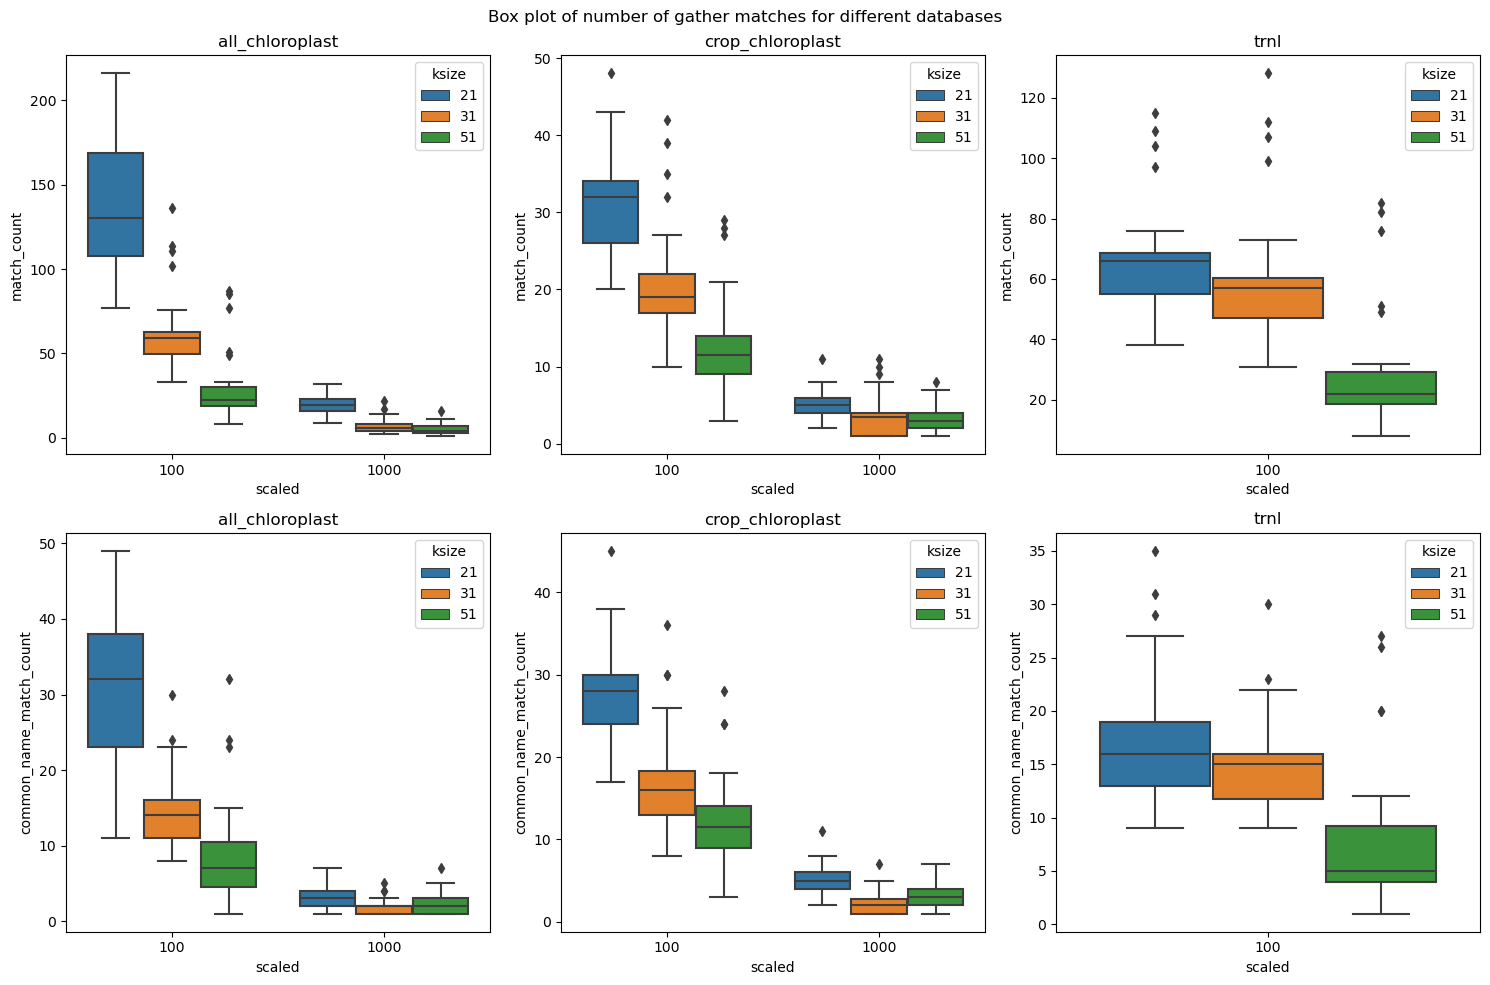

In [57]:


# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot the first box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'all_chloroplast'], ax=axes[0,0])
axes[0,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'crop_chloroplast'], ax=axes[0,1])
axes[0,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='match_count', hue='ksize', data=grouped[grouped['db'] == 'trnl_1'], ax=axes[0,2])
axes[0,2].set_title('trnl')


# Plot the first box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'all_chloroplast'], ax=axes[1,0])
axes[1,0].set_title('all_chloroplast')

# Plot the second box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'crop_chloroplast'], ax=axes[1,1])
axes[1,1].set_title('crop_chloroplast')

# Plot the third box plot
sns.boxplot(x='scaled', y='common_name_match_count', hue='ksize', data=grouped_2[grouped_2['db'] == 'trnl_1'], ax=axes[1,2])
axes[1,2].set_title('trnl')

# Adjust layout and show the plots
plt.suptitle("Box plot of number of gather matches for different databases")
plt.tight_layout()
plt.show()


In [63]:
grouped_2[(grouped_2['db'] == 'all_chloroplast') & (grouped_2['ksize'] ==21)&(grouped_2['scaled'] ==100)].mean()

C:\Users\sande\AppData\Local\Temp\ipykernel_34096\1972626275.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  grouped_2[(grouped_2['db'] == 'all_chloroplast') & (grouped_2['ksize'] ==21)&(grouped_2['scaled'] ==100)].mean()


ksize                       21.00
scaled                     100.00
common_name_match_count     31.35
dtype: float64

In [66]:
data = grouped_2[(grouped_2['db'] == 'all_chloroplast') | (grouped_2['db'] == 'trnl_1')]
data[data['db'] == 'all_chloroplast']['common_name_match_count']
data= data[data['scaled']==100]

<Axes: xlabel='db', ylabel='common_name_match_count'>

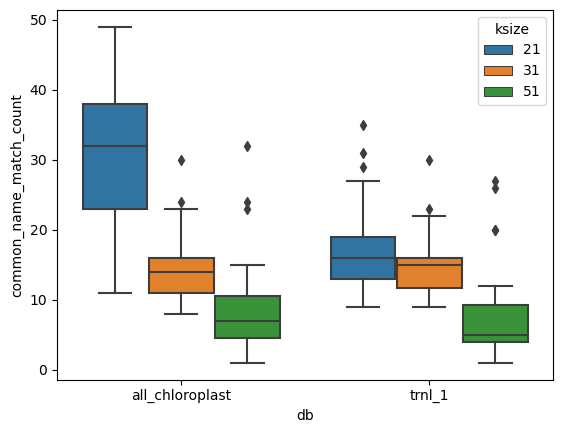

In [67]:
sns.boxplot(x='db', y='common_name_match_count', hue='ksize', data = data)

Summary stats

In [46]:
final_df.groupby(['db','scaled','ksize']).size()

db                scaled  ksize
all_chloroplast   100     21       5564
                          31       2438
                          51       1122
                  1000    21        781
                          31        271
                          51        200
crop_chloroplast  100     21       1245
                          31        819
                          51        495
                  1000    21        213
                          31        136
                          51        127
trnl_1            100     21       2637
                          31       2333
                          51       1103
dtype: int64

In [47]:
final_df[final_df['db']=='all_chloroplast']['common_name'].value_counts()[:15]

velvet bean             79
locoto                  49
oysternut               41
multibloom hoarypea     38
chirauli nut            36
sponge gourd            36
theobroma               36
avocado                 33
herb bennet             33
coyote tobacco          33
cultivated cockscomb    32
jiang guo xian          31
snakegourd              29
splitlip hempnettle     29
American shoreweed      29
Name: common_name, dtype: int64

In [84]:
# params
cond1 = final_df['db']=='crop_chloroplast'
cond2= final_df['scaled']==100
cond3 =final_df['ksize']==51

final_df[cond1 & cond2 & cond3]['common_name'].value_counts()[:15]

coriander         34
avocado           33
rocoto            31
Indian lettuce    30
apple             30
Amur grape        27
timothy           27
velvet bean       26
tea               24
kidney bean       21
theobroma         15
cinnamon          15
edible banana     12
rough lemon       11
pistachio nut     11
Name: common_name, dtype: int64

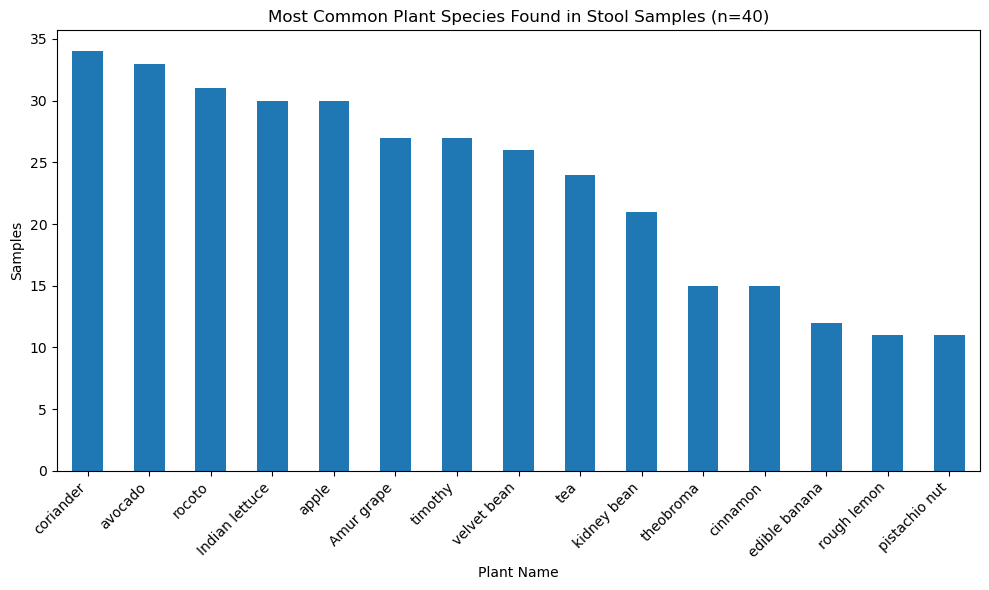

In [77]:
data_series = final_df[cond1 & cond2 & cond3]['common_name'].value_counts()[:15]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
data_series.sort_values(ascending=False).plot(kind='bar')
plt.title("Most Common Plant Species Found in Stool Samples (n=40)")
plt.xlabel('Plant Name')
plt.ylabel('Samples')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()